<a href="https://colab.research.google.com/github/MariPinas/data_science_2025/blob/main/notebooks/Lab06_Data_Cleaning/Exercicio_Analisando_os_Dados_do_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Booking - *Portugal*

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1ApHNm3gI7O7j7Kby7EU9xZo7W1E8xB6t/view?usp=drive_link)



# A [Booking.com](https://www.booking.com/) é uma das **maiores plataformas de reservas de hospedagem do mundo**. E o mais impressionante? Ela **não é dona de nenhum hotel**!

Conectando viajantes a uma vasta rede de hotéis, pousadas, apartamentos e outras opções de hospedagem, a Booking.com revolucionou a forma como as pessoas planejam suas viagens, oferecendo **milhões de propriedades em todo o mundo**.

Fundada em 1996, a empresa já ajudou **milhões de viajantes** a encontrar a hospedagem perfeita, desbancando métodos tradicionais de reserva e se tornando referência no setor de turismo.

A Booking.com também disponibiliza dados e ferramentas para desenvolvedores através da [Booking.com API](https://developers.booking.com/), permitindo a integração de suas soluções de hospedagem em outros aplicativos e plataformas.

<center>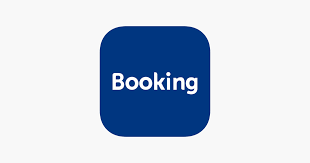</center>

**Neste *notebook*, vamos explorar dados de hospedagens em Lisboa e descobrir insights valiosos sobre tendências de viagem, preços e disponibilidade.**

**Dicionário das variáveis**

* **id** : identificação única para o anúncio
* **name** : nome do anúncio
* **host_id** : identificador único para o proprietário do imóvel
* **host_name** : nome do proprietário
* **neighbourhood_group** :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* **neighbourhood** : bairro da propriedade
* **latitude** : coordenada geográfica de latitude da propriedade
* **longitude** : coordenada geográfica de longitude da propriedade
* **room_type** : tipo de quarto oferecido para locação
* **price** : preço da diária do aluguel
* **minimum_nights** : quantidade mínima de noites para alugar o imóvel
* **number_of_reviews** : quantidade de avaliações que o imóvel tem
* **last_review** : data da última avaliação
* **reviews_per_month** : quantidade de avaliações por mês
* **calculated_host_listings_count** : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* **availability_365** : número de dias disponíveis para locação nos próximos 365 dias
* **number_of_reviews_ltm** : quantidade de avaliações nos últimos 12 meses
* **license** : número de registro do imóvel

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [61]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience-2025/booking_portugal.csv"

df = pd.read_csv(path, sep=',')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18929 entries, 0 to 18928
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18929 non-null  int64  
 1   name                            18921 non-null  object 
 2   host_id                         18929 non-null  int64  
 3   host_name                       18929 non-null  object 
 4   neighbourhood_group             18929 non-null  object 
 5   neighbourhood                   18929 non-null  object 
 6   latitude                        18929 non-null  float64
 7   longitude                       18929 non-null  float64
 8   room_type                       18929 non-null  object 
 9   price                           18929 non-null  int64  
 10  minimum_nights           

## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [62]:
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')

print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 18929 entradas (registros) e 18 atributos (variáveis).

Os tipos dos atributos são do tipo:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [63]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.892900e+04,1.892900e+04,18929.000000,18929.000000,18929.000000,18929.000000,18929.000000,16495.000000,18929.000000,18929.000000,18929.000000
mean,5.972928e+16,1.275861e+08,38.762473,-9.208912,133.735908,4.255692,51.760737,1.335881,14.965661,196.229595,11.739817
std,1.799580e+17,1.340661e+08,0.115862,0.115126,265.123753,19.846961,79.428109,1.436713,37.261586,115.172929,18.484858
min,6.499000e+03,1.445500e+04,38.661270,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.614731e+07,1.681903e+07,38.710770,-9.297790,62.000000,1.000000,3.000000,0.340000,1.000000,100.000000,0.000000
50%,2.862440e+07,7.415772e+07,38.717370,-9.147350,94.000000,2.000000,18.000000,0.940000,4.000000,224.000000,5.000000
75%,4.532870e+07,2.047378e+08,38.742960,-9.134910,148.000000,3.000000,66.000000,1.950000,12.000000,296.000000,16.000000
max,6.454518e+17,4.632359e+08,39.333706,-8.794720,9999.000000,1000.000000,1833.000000,65.480000,274.000000,365.000000,989.000000


In [64]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
reviews_per_month,12.858577
last_review,12.858577
license,7.750013
name,0.042263
id,0.000000
host_id,0.000000
latitude,0.000000
host_name,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

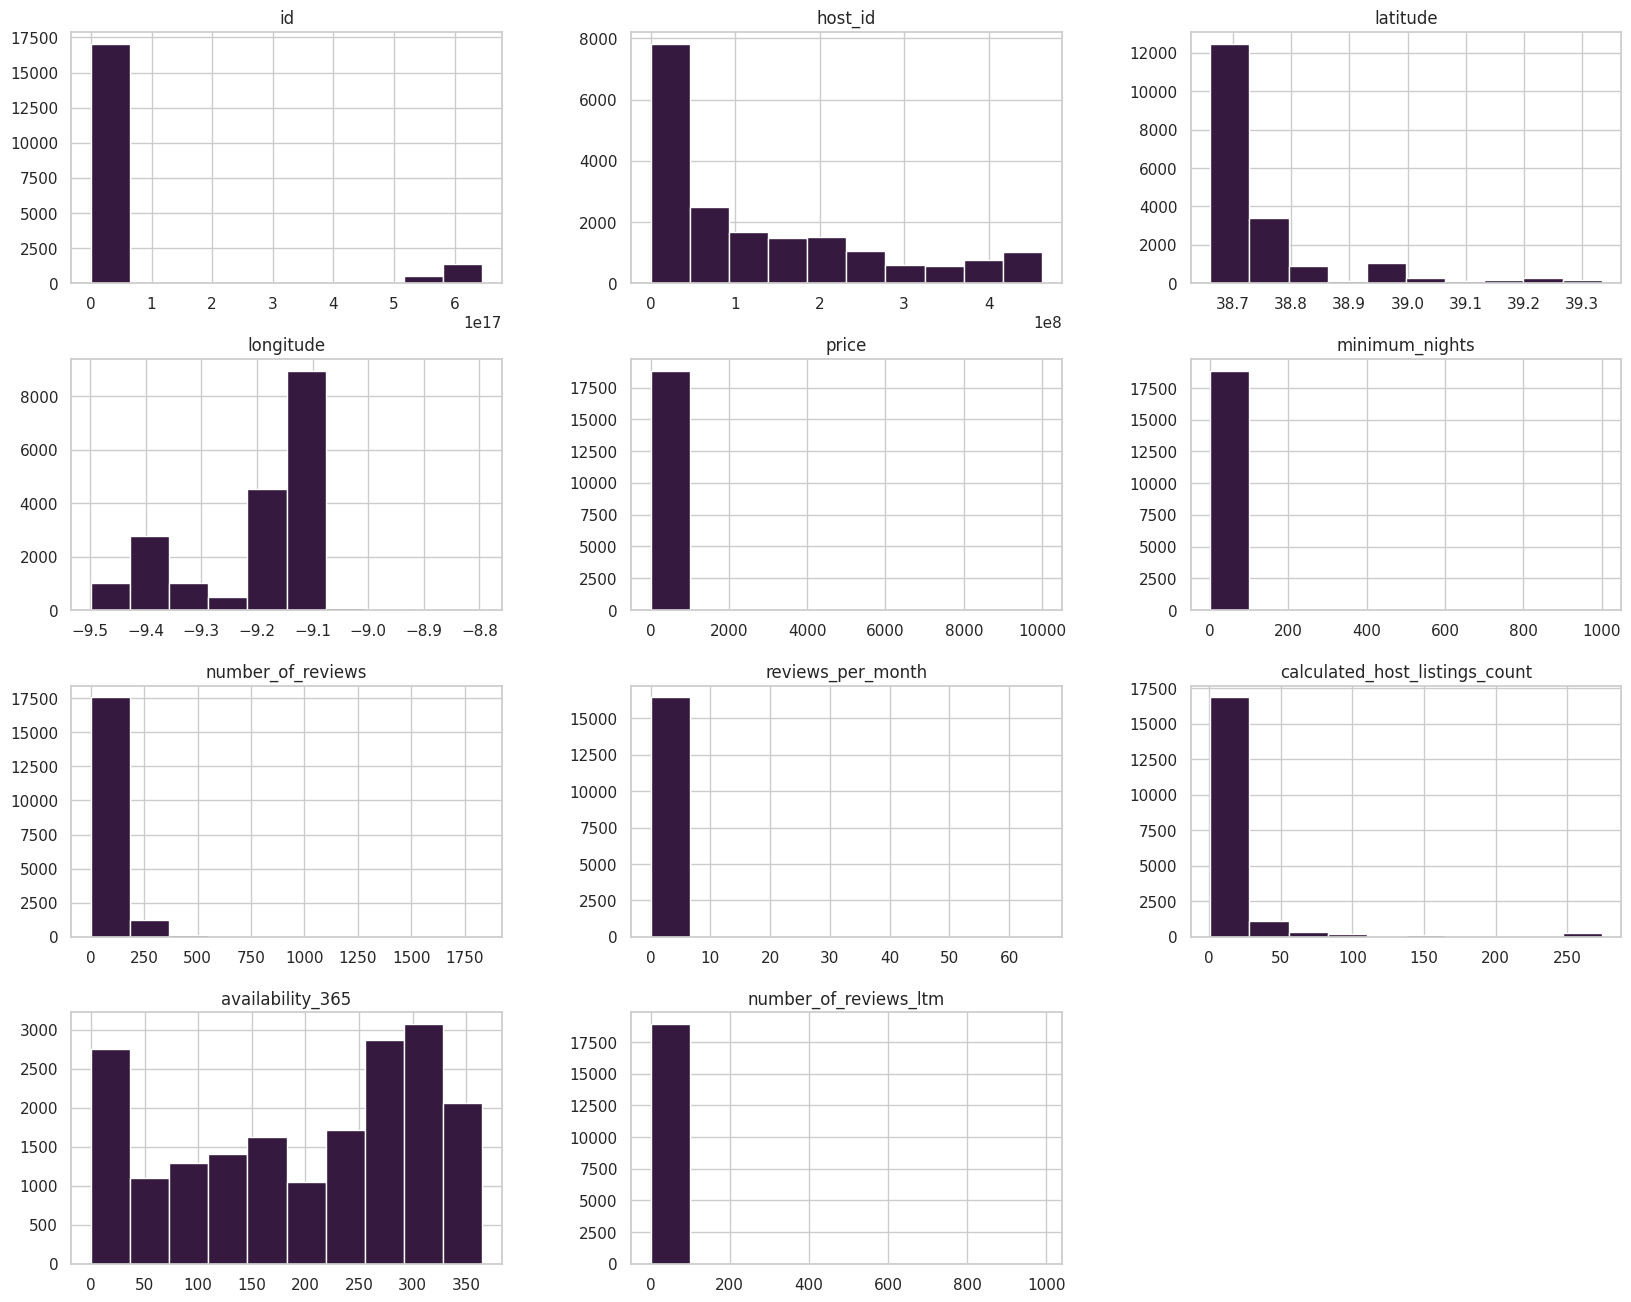

In [65]:
df.hist(figsize=(20,16));

### **Q4. Qual a média dos preços de aluguel?**

In [66]:
def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] <= 0) | (df[coluna] > limite_superior)]
    return outliers

outliers_price = detectar_outliers_iqr('price')

print(outliers_price.count())

#remover outliers
df = df.drop(outliers_price.index)

id                                1256
name                              1253
host_id                           1256
host_name                         1256
neighbourhood_group               1256
neighbourhood                     1256
latitude                          1256
longitude                         1256
room_type                         1256
price                             1256
minimum_nights                    1256
number_of_reviews                 1256
last_review                        900
reviews_per_month                  900
calculated_host_listings_count    1256
availability_365                  1256
number_of_reviews_ltm             1256
license                           1162
dtype: int64


In [67]:
df.shape

(17673, 18)

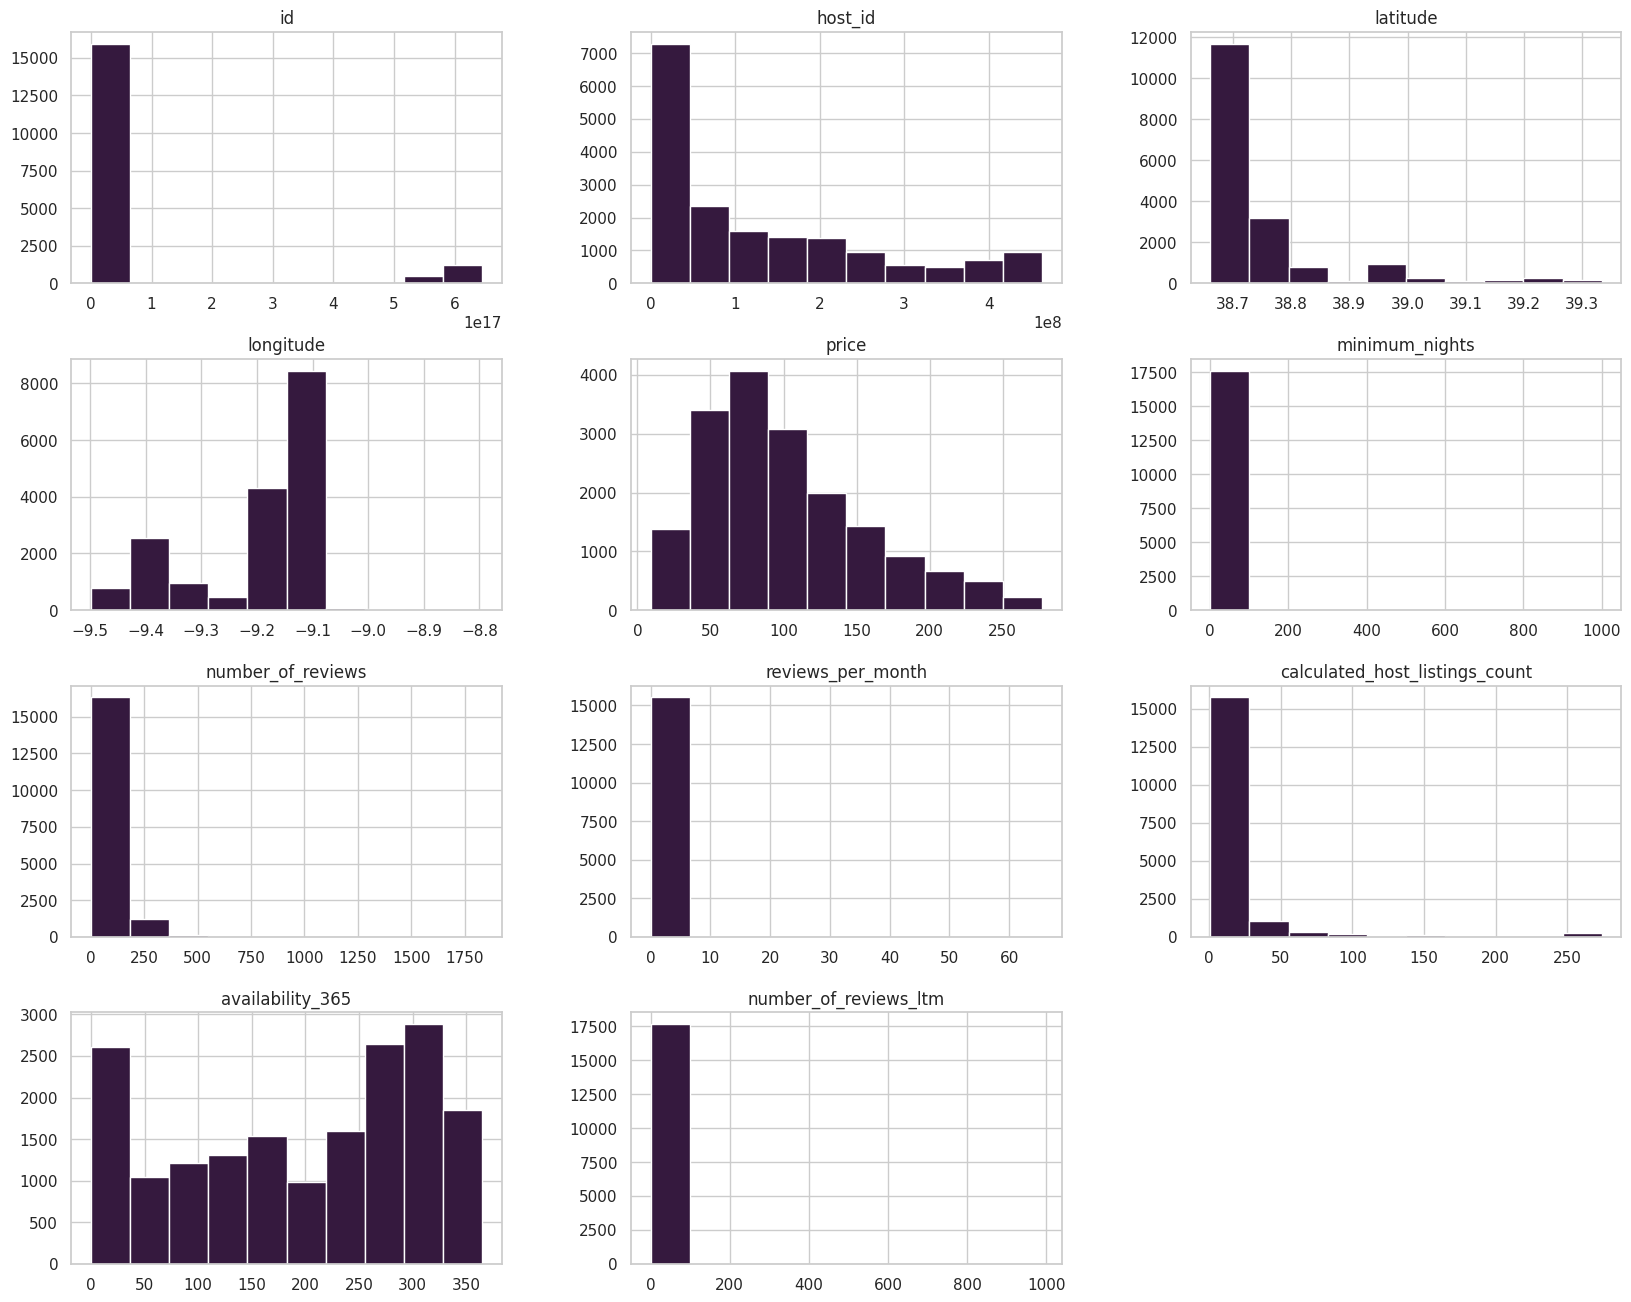

In [68]:
df.hist(figsize=(20,16));

In [69]:
mediaPreco = df['price'].mean()

print(f'A media de precos de aluguel é {mediaPreco:.2f} euros')

mediana = df['price'].median()

print(mediana)


A media de precos de aluguel é 101.33 euros
89.0


### **Q5. Qual o tipo de imóvel mais disponível no Booking?**

In [70]:
tipoImovel = df.groupby(by='room_type').size().reset_index(name='qtd')
tipoImovel

,room_type,qtd
0,Entire home/apt,13385
1,Hotel room,208
2,Private room,3884
3,Shared room,196


### **Q6. Qual a localidade mais cara?**



In [71]:
# localidadeCara = df['neighbourhood_group'].max()


localidadeCara = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
localidadeCara.head(1)

,price
neighbourhood_group,
Cascais,109.049838


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [72]:
def detectar_outliers_iqr(colune):
    Q1 = df[colune].quantile(0.25)
    Q3 = df[colune].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[colune] <= 0) | (df[colune] > limite_superior)]
    return outliers

outliers_localidade = detectar_outliers_iqr('minimum_nights')

print(outliers_localidade.count())

#remover outliers
df = df.drop(outliers_localidade.index)

id                                2272
name                              2271
host_id                           2272
host_name                         2272
neighbourhood_group               2272
neighbourhood                     2272
latitude                          2272
longitude                         2272
room_type                         2272
price                             2272
minimum_nights                    2272
number_of_reviews                 2272
last_review                       1732
reviews_per_month                 1732
calculated_host_listings_count    2272
availability_365                  2272
number_of_reviews_ltm             2272
license                           1946
dtype: int64


In [73]:
minimoNoites = df['minimum_nights'].sort_values(ascending=True)
minimoNoites.head(1)

mediaNoites = df['minimum_nights'].mean()

print(f'A media do minimo de noites: {mediaNoites:.2f}')


A media do minimo de noites: 2.15


In [74]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.540100e+04,1.540100e+04,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,13863.000000,15401.000000,15401.000000,15401.000000
mean,5.693076e+16,1.275663e+08,38.757589,-9.201140,102.834621,2.147912,57.857412,1.452661,16.081618,199.544380,13.351665
std,1.760353e+17,1.337981e+08,0.110585,0.110098,55.015113,0.916340,84.031304,1.500901,40.157444,113.612804,19.710752
min,6.499000e+03,1.445500e+04,38.661270,-9.498520,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.628560e+07,1.682419e+07,38.710660,-9.220570,62.000000,1.000000,5.000000,0.410000,1.000000,105.000000,1.000000
50%,2.842475e+07,7.479246e+07,38.716590,-9.146440,90.000000,2.000000,23.000000,1.040000,4.000000,230.000000,7.000000
75%,4.472098e+07,2.037731e+08,38.737090,-9.134320,133.000000,3.000000,77.000000,2.100000,12.000000,297.000000,19.000000
max,6.454518e+17,4.632359e+08,39.333706,-8.794720,277.000000,4.000000,1833.000000,65.480000,274.000000,365.000000,989.000000
